In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
df = pd.read_csv(r"C:\Users\shijin kunju\Desktop\ironhack\week5\day1\amz_uk_price_prediction_dataset.csv")

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [9]:
# --- Part 1: Product Categories ---
# Frequency Table
category_freq = df['category'].value_counts().reset_index()
category_freq.columns = ['Category', 'Count']
top_5_categories = category_freq.head(5)
print("Top 5 Categories:\n", top_5_categories)


Top 5 Categories:
                                  Category   Count
0                       Sports & Outdoors  836265
1                                  Beauty   19312
2  Handmade Clothing, Shoes & Accessories   19229
3                             Bath & Body   19092
4                          Birthday Gifts   18978


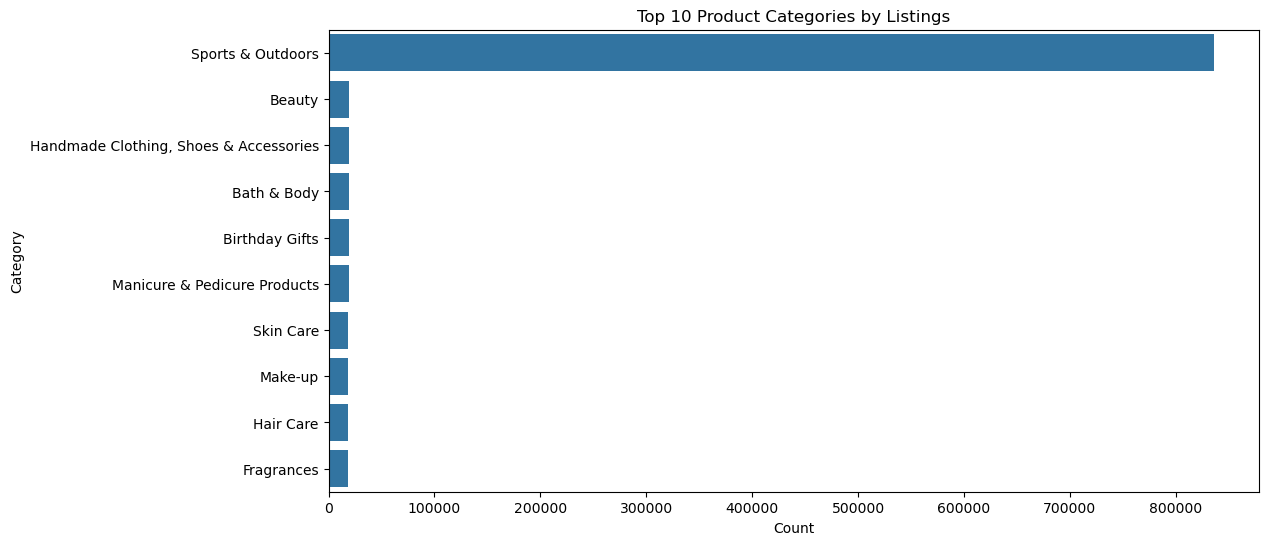

In [10]:
# Bar Chart (Top 10 for clarity)
plt.figure(figsize=(12, 6))
sns.barplot(data=category_freq.head(10), x='Count', y='Category')
plt.title('Top 10 Product Categories by Listings')
plt.show()


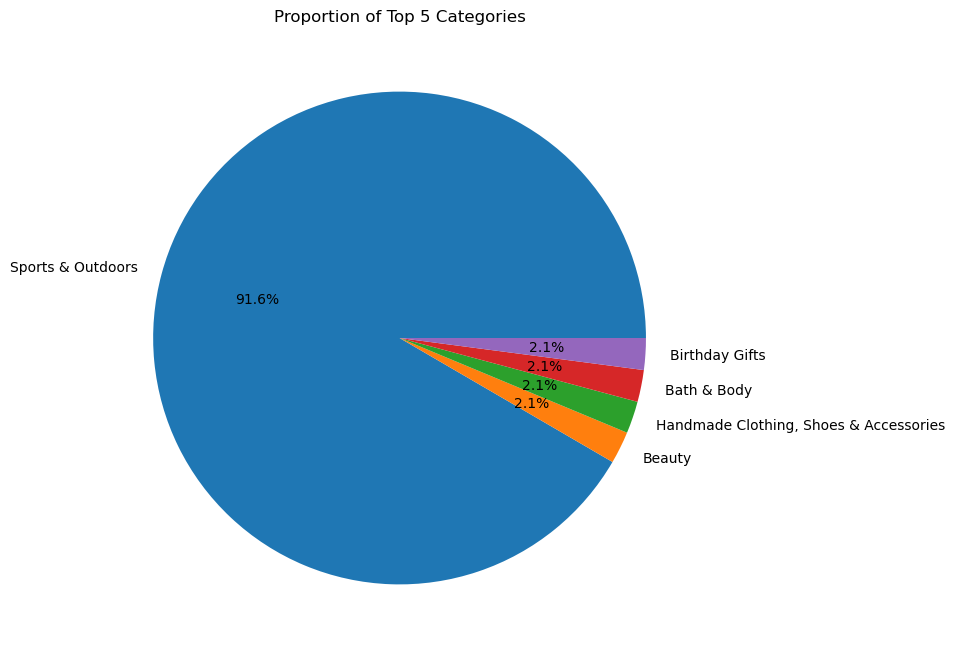

In [11]:
# Pie Chart (Top 5)
plt.figure(figsize=(8, 8))
top_5 = category_freq.head(5)
plt.pie(top_5['Count'], labels=top_5['Category'], autopct='%1.1f%%')
plt.title('Proportion of Top 5 Categories')
plt.show()


In [12]:
# --- Part 2: Product Pricing ---
# Handle missing prices
price_clean = df['price'].dropna()


In [13]:
# Centrality
mean_price = price_clean.mean()
median_price = price_clean.median()
mode_price = price_clean.mode()[0]  # First mode
print(f"Mean Price: £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Mode Price: £{mode_price:.2f}")


Mean Price: £89.24
Median Price: £19.09
Mode Price: £9.99


In [14]:
# Dispersion
variance = price_clean.var()
std_dev = price_clean.std()
price_range = price_clean.max() - price_clean.min()
q3, q1 = price_clean.quantile(0.75), price_clean.quantile(0.25)
iqr = q3 - q1
print(f"Variance: £²{variance:.2f}")
print(f"Standard Deviation: £{std_dev:.2f}")
print(f"IQR: £{iqr:.2f}")


Variance: £²119445.49
Standard Deviation: £345.61
IQR: £36.00


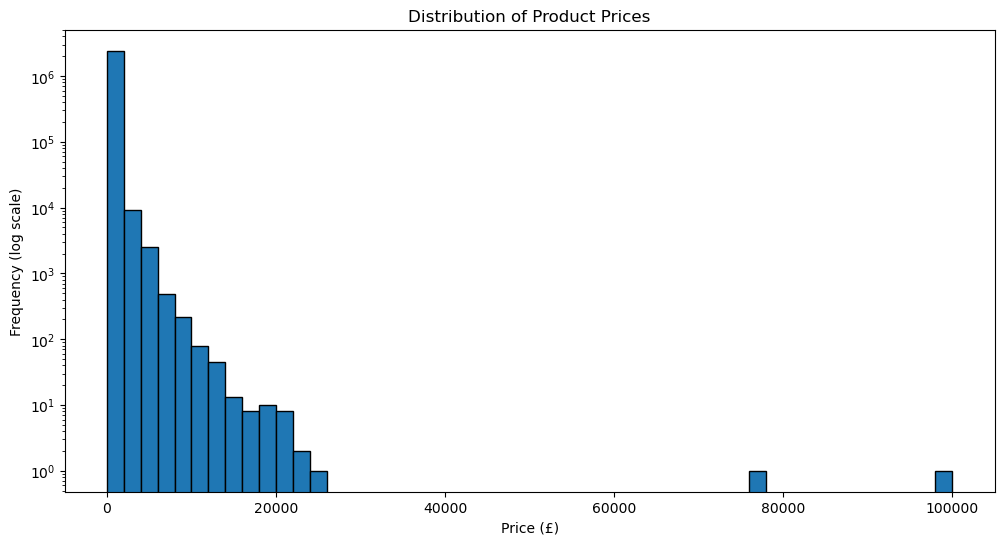

In [15]:
# Histogram (log scale for readability)
plt.figure(figsize=(12, 6))
plt.hist(price_clean, bins=50, edgecolor='black', log=True)
plt.xlabel('Price (£)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Product Prices')
plt.show()


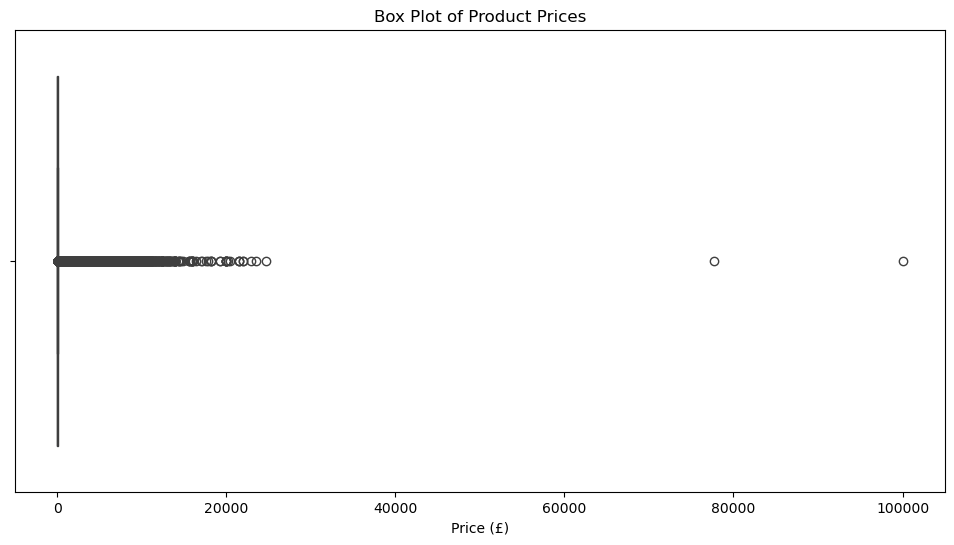

In [16]:

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=price_clean)
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')
plt.show()


In [22]:
# --- Part 3: Product Ratings ---
# Handle missing ratings
stars_clean = df['stars'].dropna()




In [23]:
# Centrality
mean_rating = stars_clean.mean()
median_rating = stars_clean.median()
mode_rating = stars_clean.mode()[0]
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating: {mode_rating:.2f}")


Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00


In [24]:
# Dispersion
rating_var = stars_clean.var()
rating_std = stars_clean.std()
rating_iqr = stars_clean.quantile(0.75) - stars_clean.quantile(0.25)
print(f"Rating Variance: {rating_var:.2f}")
print(f"Rating Standard Deviation: {rating_std:.2f}")
print(f"Rating IQR: {rating_iqr:.2f}")


Rating Variance: 4.82
Rating Standard Deviation: 2.19
Rating IQR: 4.40


In [25]:
# Skewness and Kurtosis
rating_skew = skew(stars_clean)
rating_kurt = kurtosis(stars_clean)
print(f"Skewness: {rating_skew:.2f} (Negative = left skew, Positive = right skew)")
print(f"Kurtosis: {rating_kurt:.2f} (>3 = heavier tails than normal)")


Skewness: 0.08 (Negative = left skew, Positive = right skew)
Kurtosis: -1.93 (>3 = heavier tails than normal)


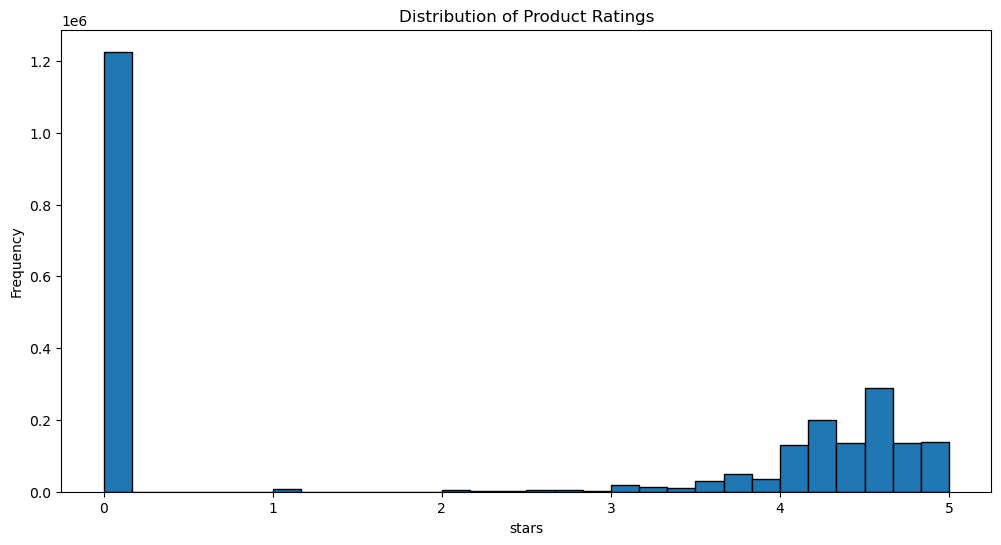

In [26]:

# Histogram
plt.figure(figsize=(12, 6))
plt.hist(stars_clean, bins=30, edgecolor='black')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()